In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

### Importing an extension of the "missing" functions from Pandas

In [2]:
%run utils/u.0.0-pandas_missing_extension.ipynb

### Importing functions of the DataFrame Dictionary

In [3]:
%run utils/u.0.1-df_dictionary.ipynb

### Getting the interim data

In [4]:
arg_di_df = pd.read_csv('../data/interim/WDICSV_INTERIM.csv')
print(arg_di_df.shape)
arg_di_df.info()

(64, 98)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 98 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      64 non-null     int64  
 1   EG.ELC.ACCS.ZS            33 non-null     float64
 2   FX.OWN.TOTL.ZS            4 non-null      float64
 3   FX.OWN.TOTL.OL.ZS         4 non-null      float64
 4   FX.OWN.TOTL.40.ZS         4 non-null      float64
 5   FX.OWN.TOTL.PL.ZS         4 non-null      float64
 6   FX.OWN.TOTL.60.ZS         4 non-null      float64
 7   FX.OWN.TOTL.SO.ZS         4 non-null      float64
 8   FX.OWN.TOTL.YG.ZS         4 non-null      float64
 9   per_si_allsi.adq_pop_tot  12 non-null     float64
 10  per_allsp.adq_pop_tot     12 non-null     float64
 11  per_sa_allsa.adq_pop_tot  12 non-null     float64
 12  per_lm_alllm.adq_pop_tot  10 non-null     float64
 13  SE.PRM.TENR               26 non-null     float64
 14  SL.

### Setting initial plots styles

In [5]:
sns.set_style(
    style="whitegrid",
    rc={
        "figure.figsize": (10,10)
    }
)

### First missing variables summaries

In [6]:
arg_di_df.missing.missing_variable_summary().sort_values("pct_missing", ascending=False)

,variable,n_missing,n_cases,pct_missing
14,SL.TLF.0714.SW.TM,64,64,100.0
39,SE.TER.CUAT.DO.ZS,64,64,100.0
38,SE.TER.CUAT.MS.ZS,64,64,100.0
34,SE.SEC.CUAT.PO.ZS,64,64,100.0
32,SE.TER.CUAT.BA.ZS,64,64,100.0
...,...,...,...,...
69,SP.POP.0014.TO.ZS,0,64,0.0
48,NY.GDP.PCAP.KD,0,64,0.0
46,NY.GDP.MKTP.KD,0,64,0.0
45,IT.MLT.MAIN,0,64,0.0


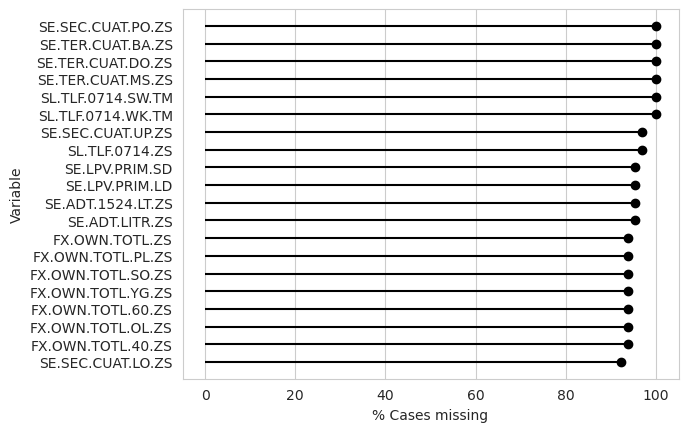

In [7]:
arg_di_df.missing.missing_variable_plot(20)

### Adding one column for years of military dictatorship

In [7]:
years_of_military_dictatorship = [
    (1930,1932),
    (1943,1946),
    (1955,1958),
    (1962,1963),
    (1966,1973),
    (1976,1983)
]

arg_di_df['year.of.dictatorship'] = arg_di_df['Year'].apply(lambda year: any(start <= year <= end for start, end in years_of_military_dictatorship))

In [9]:
dictionary = pd.read_csv('../data/utils/DF_DICTIONARY.csv')
dictionary = pd.concat(
    [
        dictionary,
        pd.DataFrame({
            'Indicator Name': ['It was a year of military dictatorship'],
            'Indicator Code': ['year.of.dictatorship'],
        })
    ]
)
df_dictionary = dictionary.to_csv('../data/utils/DF_DICTIONARY.csv', index=False)

<Axes: >

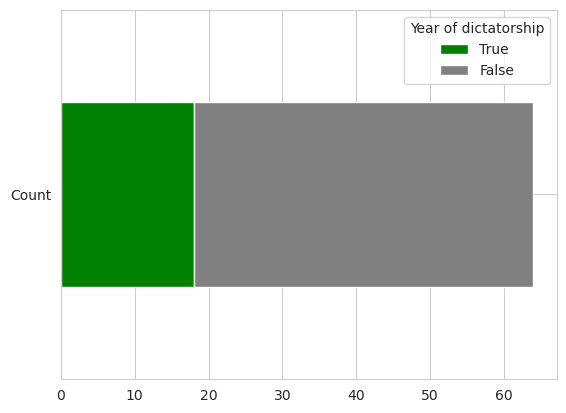

In [8]:
years_of_dictatorship = pd.DataFrame(arg_di_df.rename(columns={"year.of.dictatorship": "Year of dictatorship"}).value_counts('Year of dictatorship',ascending=True))
years_of_dictatorship = years_of_dictatorship.rename(columns={"count": "Count"}).T
years_of_dictatorship.plot(kind='barh',stacked=True, color=['green','grey'])

### Exploring missing data of years of military dictatorship

In [10]:
arg_dictorship_years_df = arg_di_df[arg_di_df['year.of.dictatorship']]
arg_dictorship_years_df

,Year,EG.ELC.ACCS.ZS,FX.OWN.TOTL.ZS,FX.OWN.TOTL.OL.ZS,FX.OWN.TOTL.40.ZS,FX.OWN.TOTL.PL.ZS,FX.OWN.TOTL.60.ZS,FX.OWN.TOTL.SO.ZS,FX.OWN.TOTL.YG.ZS,per_si_allsi.adq_pop_tot,...,SE.TER.ENRR,SE.SEC.DURS,SL.EMP.SELF.ZS,SL.UEM.NEET.ME.ZS,SL.UEM.ADVN.ZS,SL.UEM.BASC.ZS,SL.UEM.INTM.ZS,SL.UEM.TOTL.ZS,SP.URB.TOTL.IN.ZS,year.of.dictatorship
2,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.767,True
3,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.309,True
6,1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.888,True
7,1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.398,True
8,1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.901,True
9,1969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.394,True
10,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.377590,5.0,NaN,NaN,NaN,NaN,NaN,NaN,78.880,True
11,1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.440980,5.0,NaN,NaN,NaN,NaN,NaN,NaN,79.321,True
12,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.620810,5.0,NaN,NaN,NaN,NaN,NaN,NaN,79.743,True
13,1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.751631,5.0,NaN,NaN,NaN,NaN,NaN,NaN,80.158,True


#### Getting the percentage of variables with a minimum percentage of missing values

In [9]:
def percentage_of_variables_with_pct_missing(df: pd.DataFrame, percentage: float, greater_than_pct = True):
    variable_summary = df.missing.missing_variable_summary()
    if greater_than_pct:
        return round(variable_summary[variable_summary['pct_missing'] >= percentage]['variable'].count() / variable_summary.shape[0], 2)
    else:
        return round(variable_summary[variable_summary['pct_missing'] <= percentage]['variable'].count() / variable_summary.shape[0], 2)

#### Getting the column names with a maximum percentage of missing values

In [10]:
def columns_with_pct_missing(df: pd.DataFrame, percentage: float, greater_than_pct = True):
    variable_summary = df.missing.missing_variable_summary()
    if greater_than_pct:
        missing_variables_code = list(variable_summary[variable_summary['pct_missing'] >= percentage]['variable'])
    else:
        missing_variables_code = list(variable_summary[variable_summary['pct_missing'] <= percentage]['variable'])
    return missing_variables_code

### Getting the rows with more missing values

In [11]:
def cases_with_pct_missing(df: pd.DataFrame, percentage: float, greater_than_pct = True):
    variable_summary = df.missing.missing_case_summary()
    if greater_than_pct:
        indexes_of_cases = list(variable_summary[variable_summary['pct_missing'] > percentage]['case'])
    else:
        indexes_of_cases = list(variable_summary[variable_summary['pct_missing'] < percentage]['case'])
    return arg_di_df.loc[arg_di_df.index.isin(indexes_of_cases)]

### Separating the most and least complete years 

In [15]:
arg_di_df_worst_cases = cases_with_pct_missing(arg_di_df, 50)
arg_di_df_best_cases = cases_with_pct_missing(arg_di_df, 50, False)

arg_di_df_best_cases

,Year,EG.ELC.ACCS.ZS,FX.OWN.TOTL.ZS,FX.OWN.TOTL.OL.ZS,FX.OWN.TOTL.40.ZS,FX.OWN.TOTL.PL.ZS,FX.OWN.TOTL.60.ZS,FX.OWN.TOTL.SO.ZS,FX.OWN.TOTL.YG.ZS,per_si_allsi.adq_pop_tot,...,SE.TER.ENRR,SE.SEC.DURS,SL.EMP.SELF.ZS,SL.UEM.NEET.ME.ZS,SL.UEM.ADVN.ZS,SL.UEM.BASC.ZS,SL.UEM.INTM.ZS,SL.UEM.TOTL.ZS,SP.URB.TOTL.IN.ZS,year.of.dictatorship
38,1998,94.815002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.991562,6.0,27.861029,NaN,NaN,NaN,NaN,12.650,88.759,False
40,2000,95.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54.333271,6.0,27.620067,NaN,NaN,NaN,NaN,15.000,89.142,False
41,2001,95.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58.791691,6.0,28.188255,NaN,NaN,NaN,NaN,17.320,89.329,False
42,2002,96.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.059261,6.0,28.336513,NaN,13.780,22.040,21.160,19.590,89.510,False
43,2003,96.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.402451,6.0,26.327707,NaN,11.680,17.290,17.940,15.360,89.686,False
44,2004,96.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.887848,6.0,25.616946,NaN,5.732,14.753,15.534,13.522,89.860,False
45,2005,96.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.732349,6.0,25.251301,19.874,5.020,13.131,12.825,11.506,90.031,False
46,2006,97.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.195049,...,67.118591,6.0,24.352308,19.509,3.767,11.366,11.854,10.078,90.200,False
47,2007,97.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66.909447,6.0,23.643223,19.240,NaN,NaN,NaN,8.470,90.366,False
48,2008,97.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.816292,6.0,23.682824,19.421,3.826,9.374,8.345,7.837,90.530,False


<Axes: title={'center': 'Most complete cases'}>

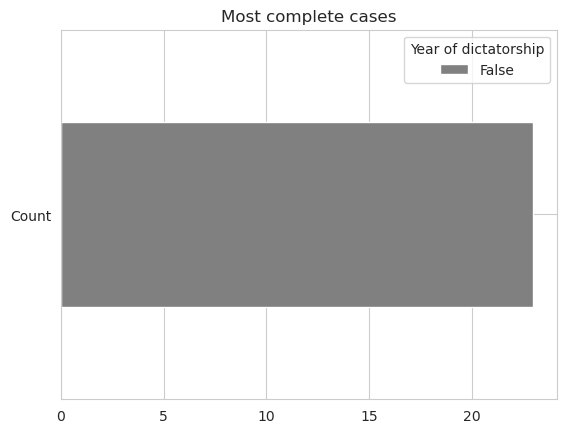

In [15]:
years_of_dictatorship = pd.DataFrame(arg_di_df_best_cases.rename(columns={"year.of.dictatorship": "Year of dictatorship"}).value_counts('Year of dictatorship',ascending=True))
years_of_dictatorship = years_of_dictatorship.rename(columns={"count": "Count"}).T
years_of_dictatorship.plot(kind='barh',stacked=True, color=['grey','green'], title="Most complete cases") #I changed the order of the colors

#### Adding indicators of 1999

In [12]:
indicators_of_1999 = arg_di_df[arg_di_df["Year"] == 1999]
indicators_of_1999.missing.missing_case_summary()


,case,n_missing,pct_missing
39,39,51,50.49505


In [16]:
arg_di_df_best_cases = pd.concat([arg_di_df_best_cases, indicators_of_1999], sort=True)
arg_di_df_best_cases

,EG.ELC.ACCS.ZS,FX.OWN.TOTL.40.ZS,FX.OWN.TOTL.60.ZS,FX.OWN.TOTL.OL.ZS,FX.OWN.TOTL.PL.ZS,FX.OWN.TOTL.SO.ZS,FX.OWN.TOTL.YG.ZS,FX.OWN.TOTL.ZS,IT.CEL.SETS,IT.MLT.MAIN,...,per_lm_alllm.adq_pop_tot,per_lm_alllm.ben_q1_tot,per_lm_alllm.cov_pop_tot,per_sa_allsa.adq_pop_tot,per_sa_allsa.ben_q1_tot,per_sa_allsa.cov_pop_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,year.of.dictatorship
38,94.815002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2670862.0,7095464.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
40,95.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6490000.0,7894210.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
41,95.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6740000.0,8131440.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
42,96.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6570000.0,7708570.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
43,96.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,8603870.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
44,96.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13500000.0,8760570.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
45,96.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22200000.0,9441670.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
46,97.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31500000.0,9459790.0,...,21.521595,13.651901,1.616476,12.671090,20.871813,11.353511,42.195049,2.398569,22.338095,False
47,97.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40400000.0,9500000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
48,97.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46500000.0,9742830.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


### Dropping columns with highest percentage of missing values

In [17]:
arg_di_df_best_cases_2 = arg_di_df_best_cases.drop(columns_with_pct_missing(arg_di_df,50), axis=1, inplace=False)
arg_di_df_best_cases_2.missing.missing_variable_summary().sort_values("pct_missing", ascending=False)

,variable,n_missing,n_cases,pct_missing
16,SE.XPD.TERT.ZS,4,24,16.666667
15,SE.XPD.SECO.ZS,4,24,16.666667
14,SE.XPD.PRIM.ZS,4,24,16.666667
23,SI.POV.GINI,1,24,4.166667
8,SE.PRE.ENRR,1,24,4.166667
0,EG.ELC.ACCS.ZS,0,24,0.000000
28,SP.DYN.LE00.IN,0,24,0.000000
24,SL.TLF.TOTL.IN,0,24,0.000000
25,SL.UEM.TOTL.ZS,0,24,0.000000
26,SM.POP.REFG,0,24,0.000000


### Exploring missing variables

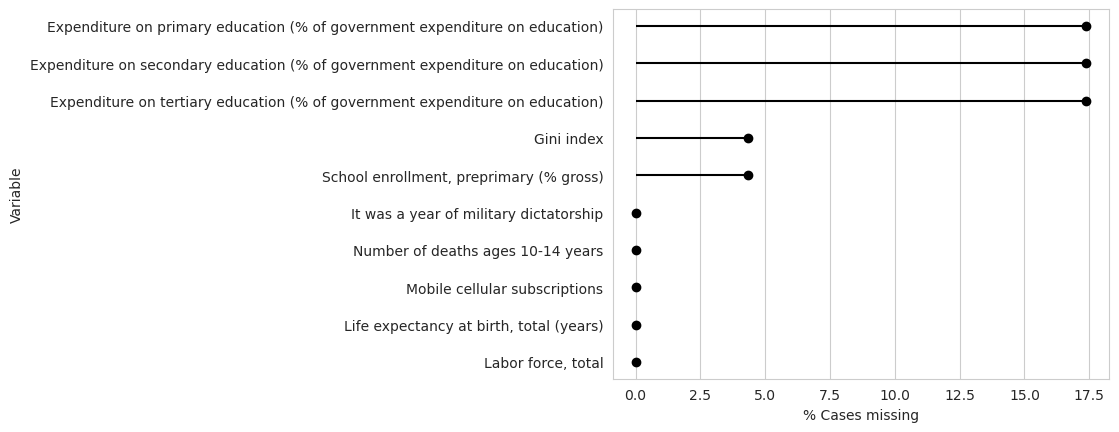

In [44]:
arg_di_df_best_cases_2.rename(columns=dictionary.set_index("Indicator Code")["Indicator Name"].to_dict(),inplace=False).missing.missing_variable_plot(10)

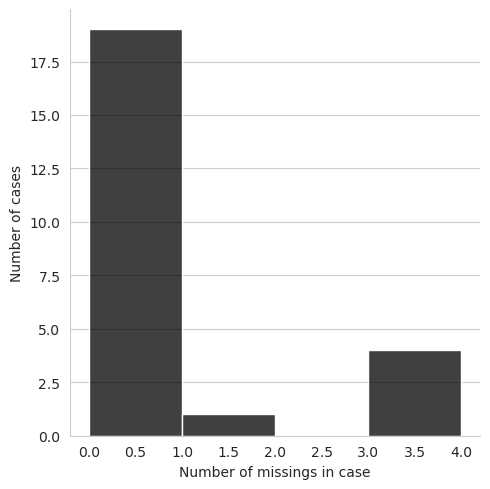

In [19]:
arg_di_df_best_cases_2.missing.missing_case_plot(30)

In [69]:
columns_with_missing_values = columns_with_pct_missing(arg_di_df_best_cases_2, 0.1, True)
columns_with_missing_values

['SE.PRE.ENRR',
 'SE.XPD.PRIM.ZS',
 'SE.XPD.SECO.ZS',
 'SE.XPD.TERT.ZS',
 'SI.POV.GINI']

##### Missing variable runs

In [53]:
all_missing_variable_run = pd.DataFrame()

for i in range(0, len(columns_with_missing_values)-1):

    missing_variable_run = (
        arg_di_df_best_cases
            .missing
            .missing_variable_run(
                variable=columns_with_missing_values[i]
            )
    )
    
    all_runs = missing_variable_run.apply(lambda row: row['run_length'] * -1 if row['is_na'] == "missing" else row['run_length'], axis=1).to_list()
    all_missing_variable_run = pd.concat(
        [
            all_missing_variable_run,
            pd.DataFrame({
                'variable': [columns_with_missing_values[i]],
                'all_runs': [all_runs]
            })
        ],
        ignore_index=True
    )

all_missing_variable_run
    

,variable,all_runs
0,SE.PRE.ENRR,"[22, -1, 1]"
1,SE.XPD.PRIM.ZS,"[19, -4, 1]"
2,SE.XPD.SECO.ZS,"[19, -4, 1]"
3,SE.XPD.TERT.ZS,"[19, -4, 1]"


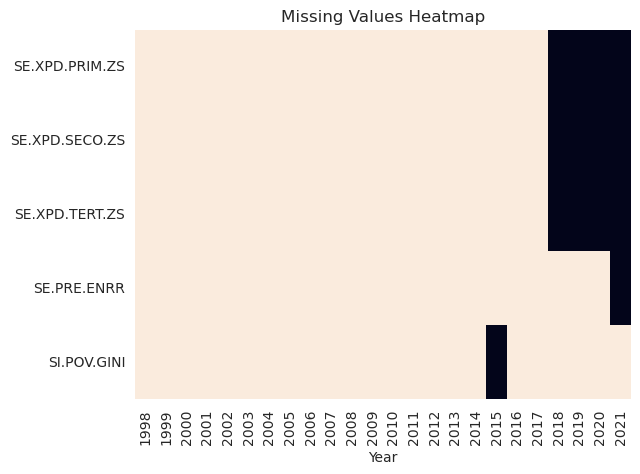

In [72]:
data = arg_di_df_best_cases_2[columns_with_missing_values + ['Year']].missing.sort_variables_by_missingness().sort_values(by="Year").set_index('Year')
sns.heatmap(~data.isnull().T,cbar=False,xticklabels=True)
plt.title("Missing Values Heatmap")
plt.show()

##### Shadow matrix

In [74]:
arg_di_df_best_cases_2.missing.bind_shadow_matrix(only_missing = True)

,EG.ELC.ACCS.ZS,IT.CEL.SETS,IT.MLT.MAIN,IT.NET.USER.ZS,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.KD,NY.GDP.PCAP.KD.ZG,SE.PRE.ENRR,SE.PRM.AGES,...,SP.POP.TOTL,SP.RUR.TOTL,SP.URB.TOTL.IN.ZS,Year,year.of.dictatorship,SE.PRE.ENRR_NA,SE.XPD.PRIM.ZS_NA,SE.XPD.SECO.ZS_NA,SE.XPD.TERT.ZS_NA,SI.POV.GINI_NA
38,94.815002,2670862.0,7095464.0,0.830767,4.127666e+11,3.850179,11391.945158,2.654348,54.836380,6.0,...,36233195.0,4072973.0,88.759,1998,False,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
40,95.700000,6490000.0,7894210.0,7.038680,3.956461e+11,-0.788999,10672.722035,-1.906987,58.735199,6.0,...,37070774.0,4025145.0,89.142,2000,False,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
41,95.500000,6740000.0,8131440.0,9.780810,3.782027e+11,-4.408840,10090.653443,-5.453797,59.571812,6.0,...,37480493.0,3999543.0,89.329,2001,False,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
42,96.100000,6570000.0,7708570.0,10.882100,3.369994e+11,-10.894485,8895.319642,-11.845950,60.240952,6.0,...,37885028.0,3974139.0,89.510,2002,False,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
43,96.300000,7840000.0,8603870.0,11.913700,3.667802e+11,8.837041,9581.969792,7.719230,60.616562,6.0,...,38278164.0,3948010.0,89.686,2003,False,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
44,96.500000,13500000.0,8760570.0,16.036700,3.998989e+11,9.029573,10341.643406,7.928157,62.300331,6.0,...,38668796.0,3921016.0,89.860,2004,False,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
45,96.700000,22200000.0,9441670.0,17.720600,4.352966e+11,8.851660,11141.310672,7.732497,63.747009,6.0,...,39070501.0,3894938.0,90.031,2005,False,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
46,97.000000,31500000.0,9459790.0,20.927200,4.703256e+11,8.047152,11913.958532,6.934982,63.676048,6.0,...,39476851.0,3868731.0,90.200,2006,False,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
47,97.200000,40400000.0,9500000.0,25.946600,5.126909e+11,9.007651,12857.092577,7.916211,64.637627,6.0,...,39876111.0,3841665.0,90.366,2007,False,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
48,97.500000,46500000.0,9742830.0,28.112600,5.334919e+11,4.057233,13246.634892,3.029785,66.605003,6.0,...,40273769.0,3813926.0,90.530,2008,False,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


<Axes: >

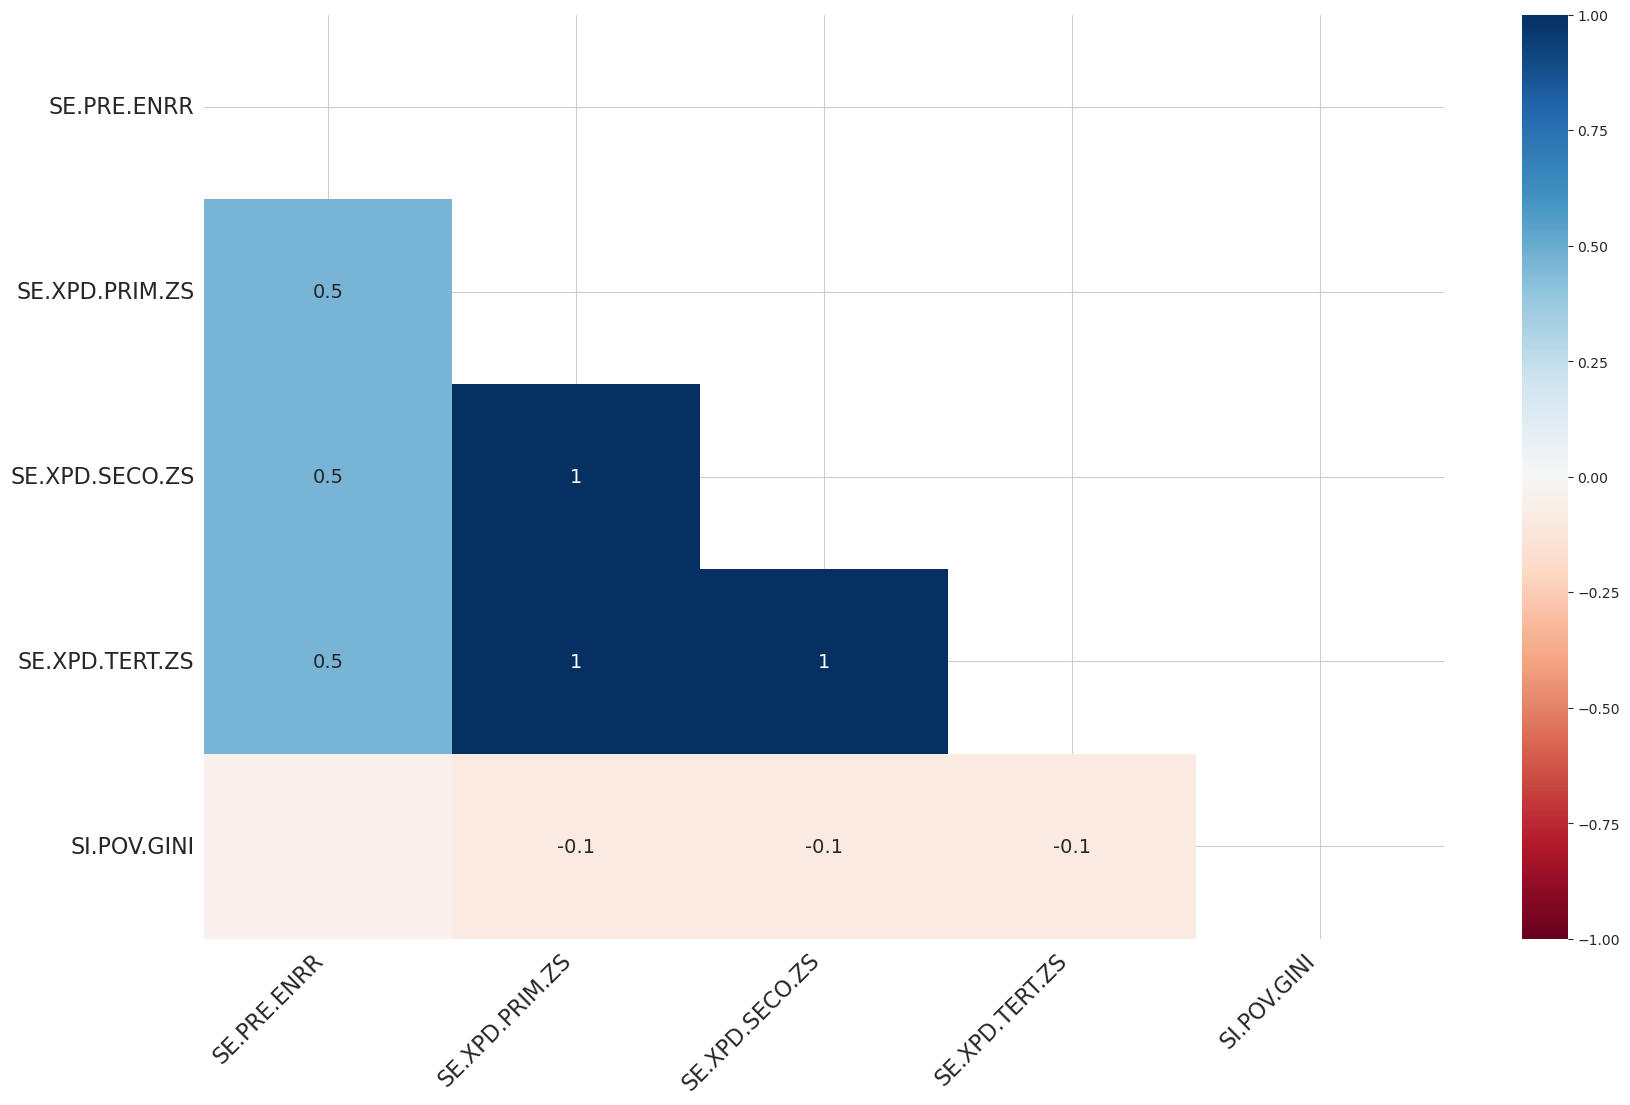

In [73]:
missingno.heatmap(df=arg_di_df_best_cases_2)

#Si da negativo: cuando falta el valor de una variable, también falta el otro en la proporción indicada. Si da positivo: tienes ambos valores en cada registro

<Axes: >

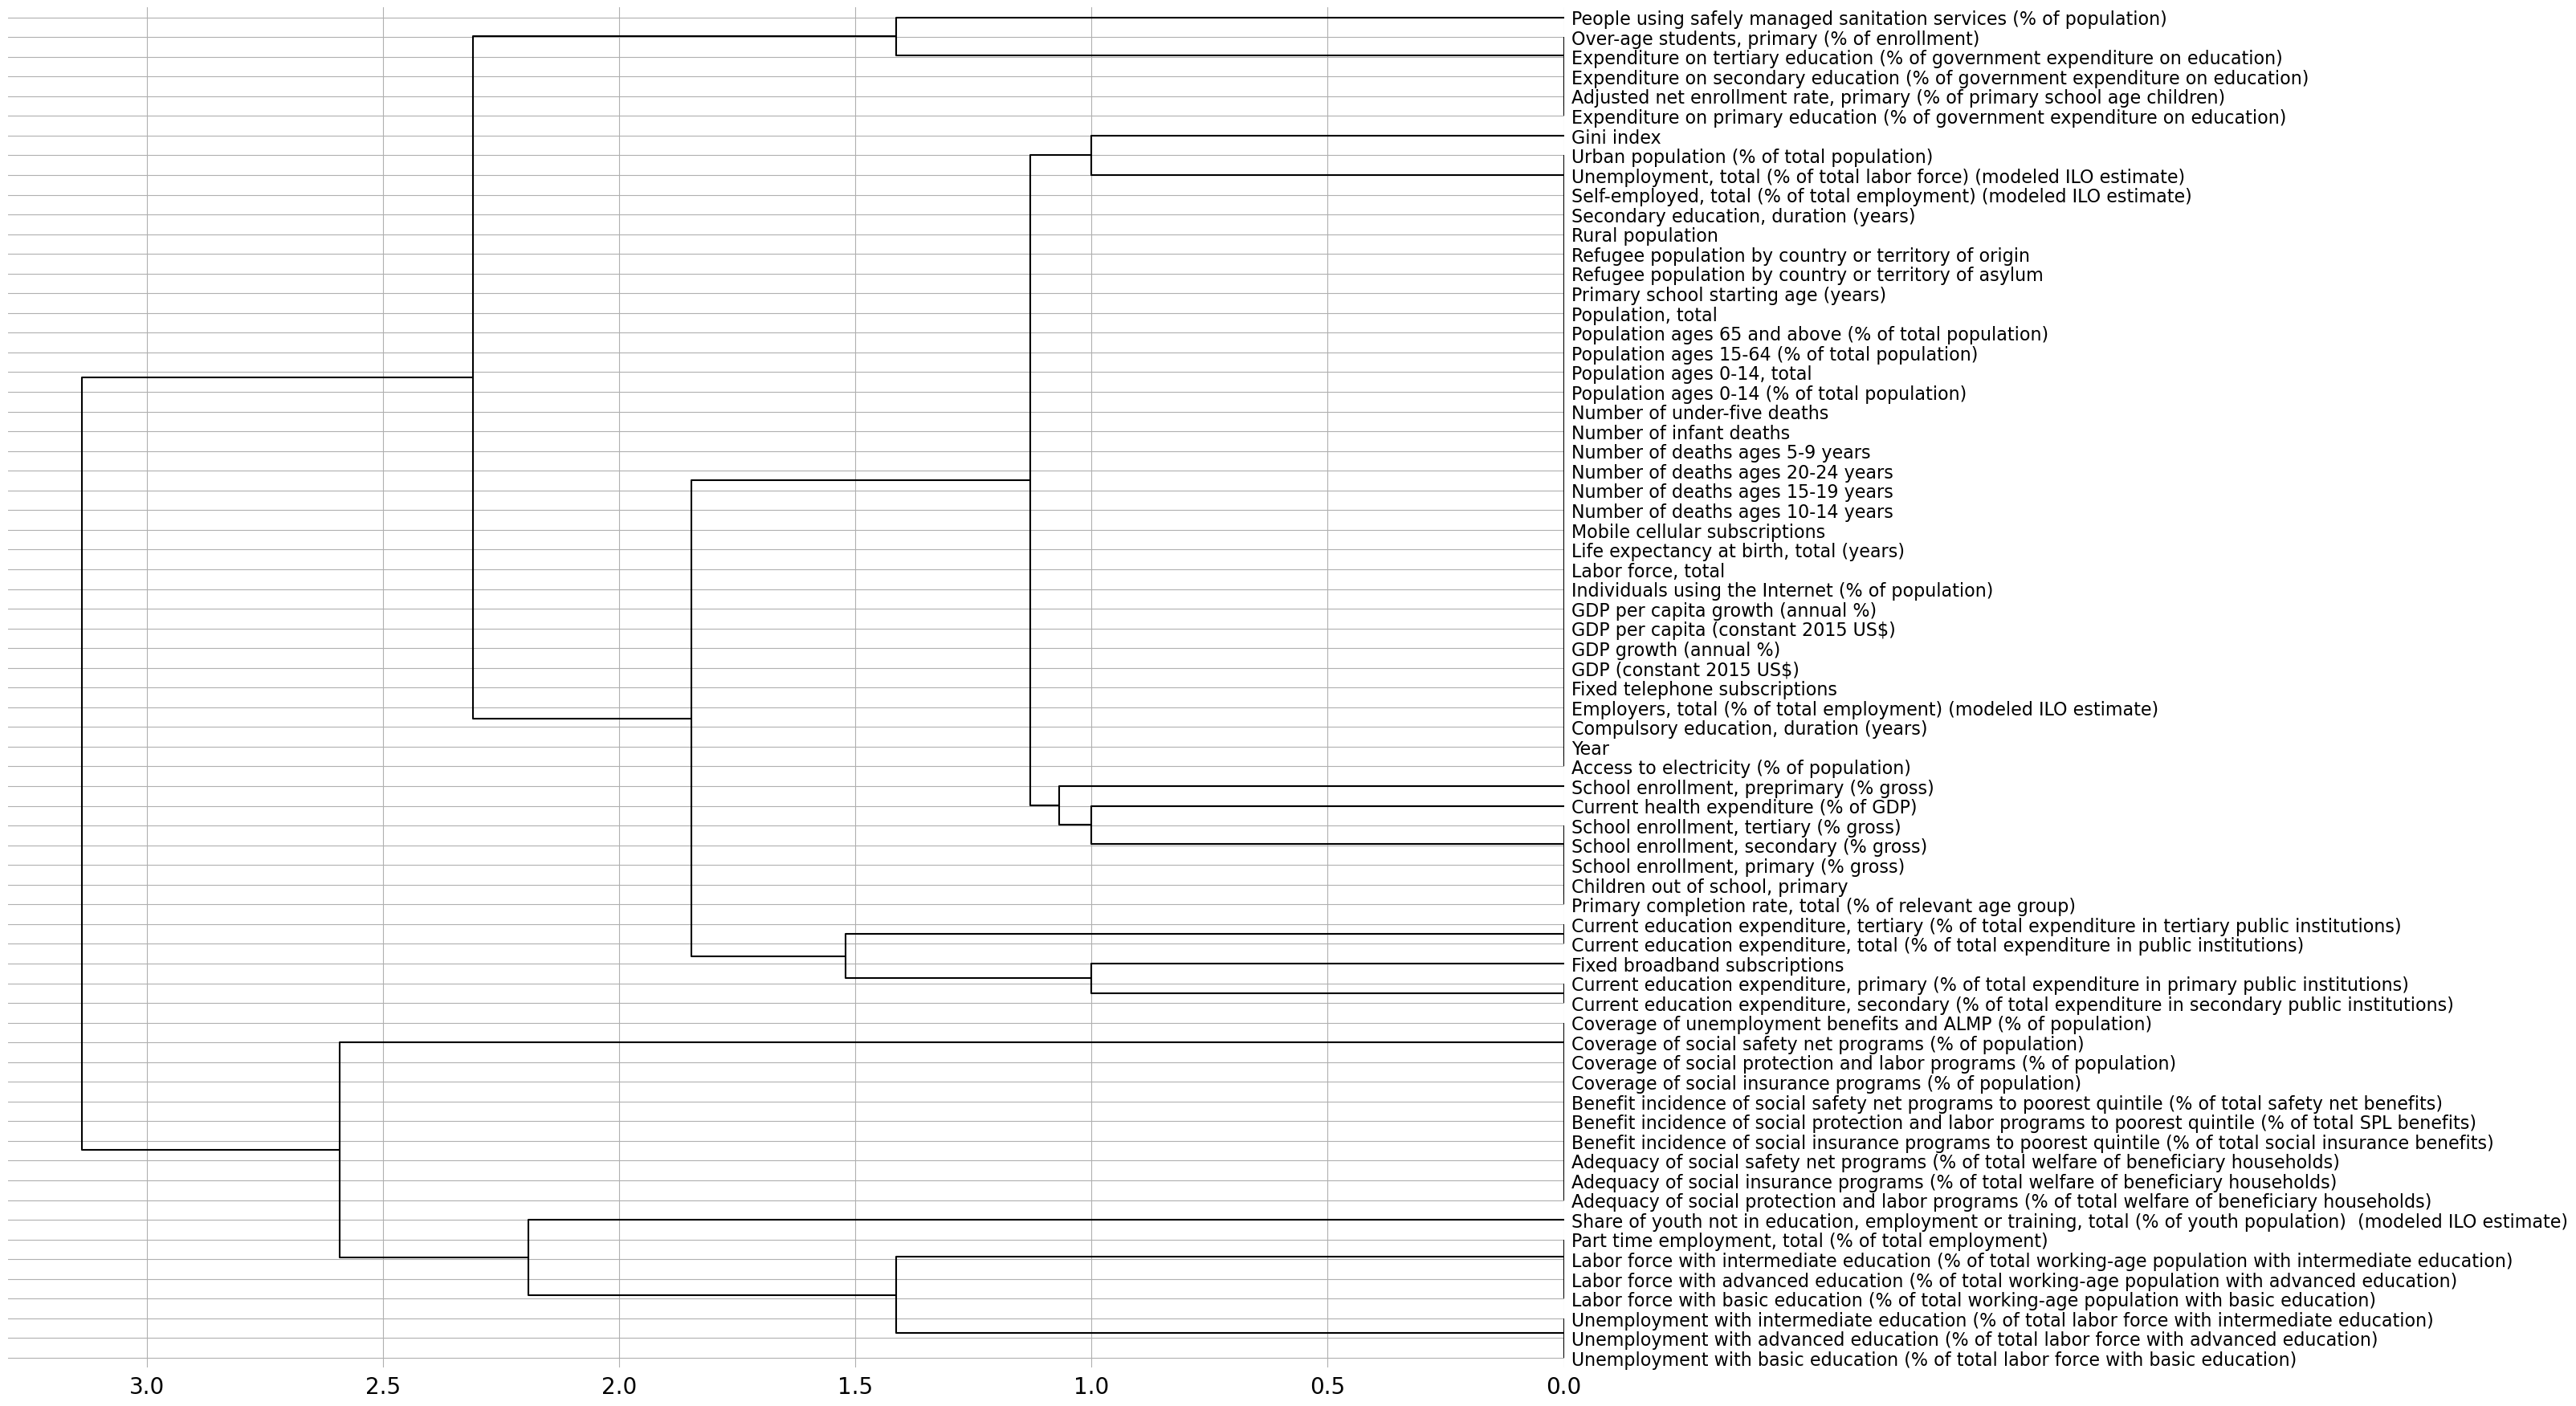

In [ ]:
missingno.dendrogram(df=arg_di_df_best_cases)
#Agrupa con clusters jerárquicos las variables con correlación muy alta (relación más cercana cuando las ramas están más cerca)

Imputation of a single value

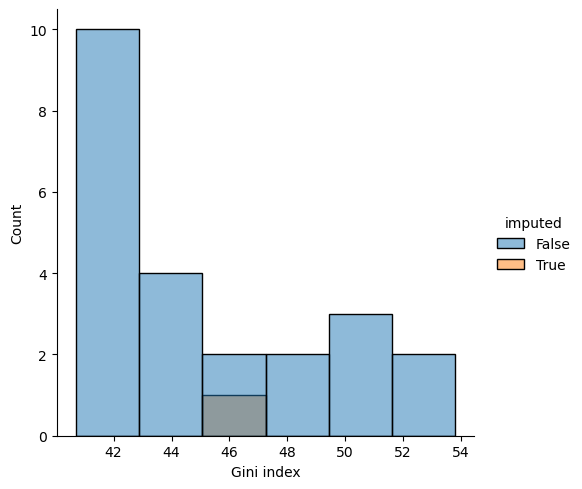

In [21]:
(
    arg_di_df_best_cases
        [["Gini index", "Year"]]
        .missing.bind_shadow_matrix(true_string=True, false_string=False)
        .apply(
            axis="rows",
            func=lambda column: column.fillna(column.mean()) if "_NA" not in column.name else column
        )
        .assign(imputed=lambda df: df["Gini index_NA"])
        .pipe(
            lambda df: (
                sns.displot(
                    data=df,
                    x="Gini index",
                    hue="imputed"
                )
            )
        )
)

In [7]:
output_indicators_file = arg_di_df_best_cases.to_csv('../data/processed/WDICSV_PROCESSED.csv', index_label='Year')